### Code to generate the data:
python -m grid --n 4 interface "python SVC.py --dataset interface --dist normal --test 1 --pte 10000 --kernel laplace --sigma 100 --ptr 1000" --seed 0 1 2 3 4 5 6 7 8 9 --d 2 3 5 10 --lam 1e-4 2e-4 5e-4 1e-3 2e-3 5e-3 1e-2 2e-2 5e-2 1e-1 2e-1 5e-1 1 2 5 1e1 2e1 5e1 1e2 2e2 5e2 1e3 2e3 5e3 1e4

### Figures for the paper

In [1]:
import os
import sys
sys.path.append("../")
import numpy as np
import utils

import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
rc('text', usetex=True)
rcParams['font.family'] = 'DejaVu Sans'
from matplotlib.patches import Patch 
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)
import matplotlib.cm as cm

/home/jonas/local/py3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  del sys.path[0]


In [2]:
name = "stretching"
data = {
    "err": dict(), 
    "alpha": dict(),
    "Delta": dict()
}
ds = utils.get_argument(name, "d")
for d in ds:
    dic = {"d": d}
    data_ = utils.get_test_error(name, dic)
    data["err"][d] = utils.class_data(data_, dic, "lam")
    data_ = utils.get_alpha(name, dic)
    data["alpha"][d] = utils.class_data(data_, dic, "lam")
    data_ = utils.get_Delta(name, dic)
    data["Delta"][d] = utils.class_data(data_, dic, "lam")

<IPython.core.display.Javascript object>


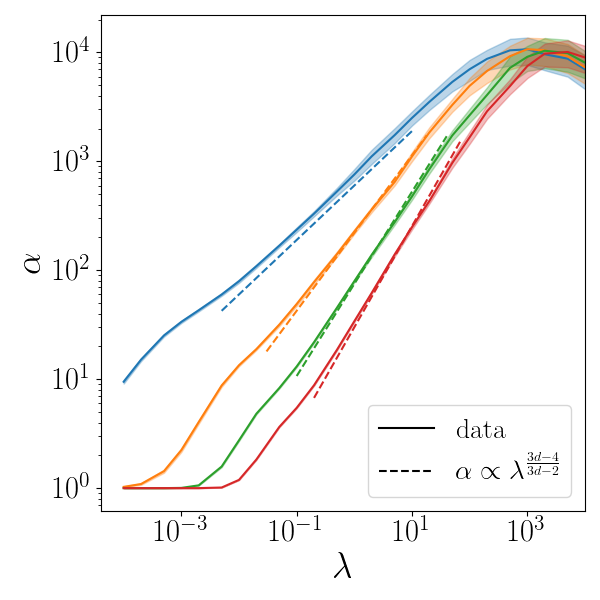

In [3]:
%matplotlib notebook

ds = utils.get_argument(name, "d")

label1 = [Line2D([0], [0], color='k', Linestyle='-', label=r"data"),
          Line2D([0], [0], color='k', Linestyle='--', label=r"$\alpha \propto \lambda^{\frac{3d-4}{3d-2}}$")]
label2 = [Patch(facecolor="C{}".format(i), label=r"$d$={}".format(d)) for i, d in enumerate(ds)]
labels = label1 + label2

xlim = {2: (0.5e-2, 1e1), 3: (3e-2, 1.8e1), 5: (1e-1, 4e1), 10: (2e-1, 7e1)}
pf = {2: 600, 3: 220, 5: 75, 10: 30}

fig, ax = plt.subplots(figsize=(6, 6))

for i, d in enumerate(ds):    
    ps, means = utils.get_mean(data["alpha"][d])
    ps, stds = utils.get_std(data["alpha"][d])
    ax.plot(ps, means, color="C{}".format(i))
    ax.fill_between(ps, means - stds / 2, means + stds / 2, color="C{}".format(i), alpha=0.3)
    #benchmark
    x = np.linspace(*xlim[d])
    y = pf[d] * x ** ((3 * d - 4) / (3 * d - 2))
    ax.plot(x, y, color="C{}".format(i), Linestyle='--')

ax.set_xlabel(r"$\lambda$", fontsize=26)
ax.set_ylabel(r"$\alpha$", fontsize=26)
ax.set(xscale='log', yscale='log')
ax.tick_params(labelsize=22)
ax.set_xlim(xmax=1e4)

plt.legend(handles=label1, loc="lower right", fontsize=20)
plt.tight_layout()
#plt.savefig("path_to_figure", format="pdf")

<IPython.core.display.Javascript object>


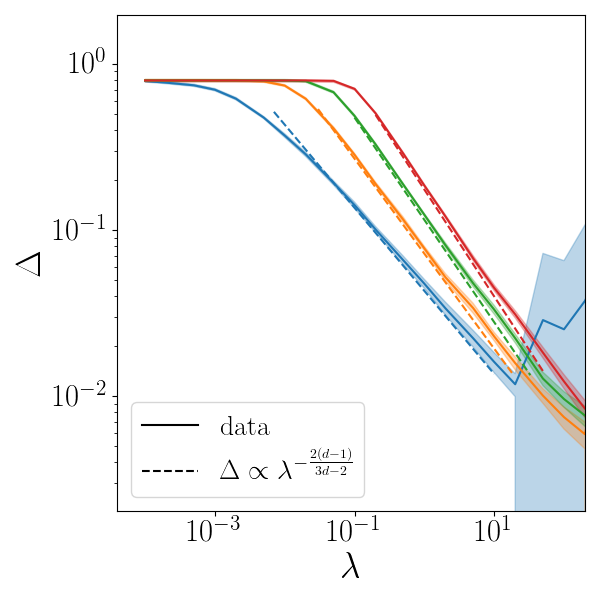

In [23]:
%matplotlib notebook

ds = utils.get_argument(name, "d")

label1 = [Line2D([0], [0], color='k', Linestyle='-', label=r"data"),
          Line2D([0], [0], color='k', Linestyle='--', label=r"$\Delta \propto \lambda^{-\frac{2(d-1)}{3d-2}}$")]
label2 = [Patch(facecolor="C{}".format(i), label=r"$d$={}".format(d)) for i, d in enumerate(ds)]
labels = label1 + label2

xlim = {2: (0.7e-2, 1e1), 3: (3e-2, 1.8e1), 5: (1e-1, 3.3e1), 10: (2e-1, 5e1)}
pf = {2: 0.043, 3: 0.072, 5: 0.115, 10: 0.175}

fig, ax = plt.subplots(figsize=(6, 6))

for i, d in enumerate(ds):    
    ps, means = utils.get_mean(data["Delta"][d])
    ps, stds = utils.get_std(data["Delta"][d])
    ax.plot(ps, means, color="C{}".format(i))
    ax.fill_between(ps, means - stds / 2, means + stds / 2, color="C{}".format(i), alpha=0.3)
    #benchmark
    x = np.linspace(*xlim[d])
    y = pf[d] * x ** (-2 * (d - 1) / (3 * d - 2))
    ax.plot(x, y, color="C{}".format(i), Linestyle='--')

ax.set_xlabel(r"$\lambda$", fontsize=26)
ax.set_ylabel(r"$\Delta$", fontsize=26)
ax.set(xscale='log', yscale='log')
ax.set_xlim(xmax=2e2)
ax.tick_params(labelsize=22)

plt.legend(handles=label1, loc="lower left", fontsize=20)
plt.tight_layout()
#plt.savefig("path_to_figure", format="pdf")

<IPython.core.display.Javascript object>


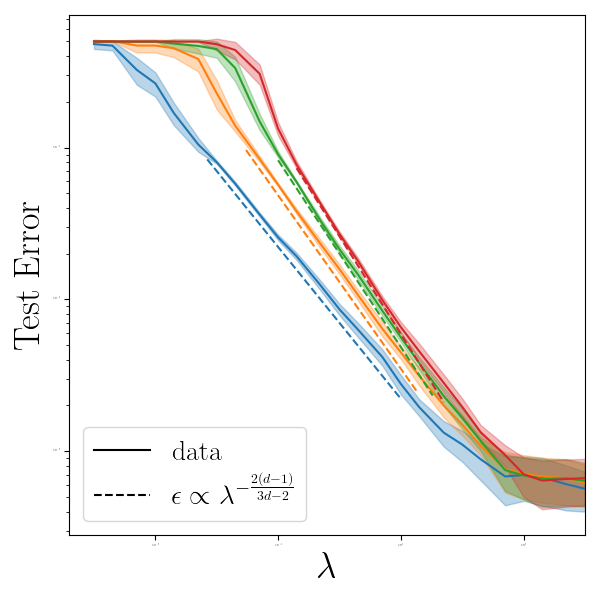

In [24]:
%matplotlib notebook

ds = utils.get_argument(name, "d")

label1 = [Line2D([0], [0], color='k', Linestyle='-', label=r"data"),
          Line2D([0], [0], color='k', Linestyle='--', label=r"$\epsilon \propto \lambda^{-\frac{2(d-1)}{3d-2}}$")]
label2 = [Patch(facecolor="C{}".format(i), label=r"$d$={}".format(d)) for i, d in enumerate(ds)]
labels = label1 + label2

xlim = {2: (0.7e-2, 1e1), 3: (3e-2, 1.8e1), 5: (1e-1, 3.3e1), 10: (2e-1, 5e1)}
pf = {2: 0.07, 3: 0.13, 5: 0.2, 10: 0.26}

fig, ax = plt.subplots(figsize=(6, 6))

for i, d in enumerate(ds):
    ps, means = utils.get_mean(data["err"][d])
    ps, stds = utils.get_std(data["err"][d])
    ax.plot(ps, means, color="C{}".format(i))
    ax.fill_between(ps, means - stds / 2, means + stds / 2, color="C{}".format(i), alpha=0.3)
    #benchmark
    x = np.linspace(*xlim[d])
    y = 0.1 * pf[d] * x ** (-2 * (d - 1) / (3 * d - 2))
    ax.plot(x, y, color="C{}".format(i),Linestyle='--')

ax.set_xlabel(r"$\lambda$", fontsize=26)
ax.set_ylabel(r"Test Error", fontsize=26)
ax.set(xscale='log', yscale='log')
ax.set_xlim(xmax=1e4)
ax.tick_params(labelsize=2)

plt.legend(handles=label1, loc="lower left", fontsize=20)
plt.tight_layout()
#plt.savefig("path_to_figure", format="pdf")